In [41]:
import sqlite3
import numpy as np 
import time
import re
import pandas as pd
from bs4 import BeautifulSoup

df=pd.read_csv('japic_cti_data_list.csv',index_col=0,header=None)

'git' は、内部コマンドまたは外部コマンド、
操作可能なプログラムまたはバッチ ファイルとして認識されていません。
'git' は、内部コマンドまたは外部コマンド、
操作可能なプログラムまたはバッチ ファイルとして認識されていません。
'git' は、内部コマンドまたは外部コマンド、
操作可能なプログラムまたはバッチ ファイルとして認識されていません。
'git' は、内部コマンドまたは外部コマンド、
操作可能なプログラムまたはバッチ ファイルとして認識されていません。
'git' は、内部コマンドまたは外部コマンド、
操作可能なプログラムまたはバッチ ファイルとして認識されていません。
'git' は、内部コマンドまたは外部コマンド、
操作可能なプログラムまたはバッチ ファイルとして認識されていません。
'git' は、内部コマンドまたは外部コマンド、
操作可能なプログラムまたはバッチ ファイルとして認識されていません。
'git' は、内部コマンドまたは外部コマンド、
操作可能なプログラムまたはバッチ ファイルとして認識されていません。


In [42]:
df

,1
0,
0,[<body>\n<!-- ▽▽ ヘッダブロック ▽▽ -->\n<header>\n<d...
1,[<body>\n<!-- ▽▽ ヘッダブロック ▽▽ -->\n<header>\n<d...
2,[<body>\n<!-- ▽▽ ヘッダブロック ▽▽ -->\n<header>\n<d...
3,[<body>\n<!-- ▽▽ ヘッダブロック ▽▽ -->\n<header>\n<d...
4,[<body>\n<!-- ▽▽ ヘッダブロック ▽▽ -->\n<header>\n<d...
...,...
0,[<body>\n<!-- ▽▽ ヘッダブロック ▽▽ -->\n<header>\n<d...
0,[<body>\n<!-- ▽▽ ヘッダブロック ▽▽ -->\n<header>\n<d...
0,[<body>\n<!-- ▽▽ ヘッダブロック ▽▽ -->\n<header>\n<d...


In [37]:
df_s=df[df.duplicated()]
df=df[~df.duplicated()]
df=df.dropna(how='all')

In [44]:
num = 0 
append=[]
for j in df[1]:
    a=[]
    num_ID=0
    num_name=0
    num_siken=0
    soup = BeautifulSoup(j, 'html.parser')
    test=soup.find_all('tr')
    for i in test:
        
        #ID
        if('JapicCTI-No.' in i.text)and(num_ID==0):
            a.append(i.text)
            num_ID=1
        #登録日   
        elif '初回登録日first registered date'in i.text:
            a.append(i)
        #試験名
        elif ('試験の名称scientific title'in i.text)and(num_name==0):
            a.append(i)
            num_name=1
        #    
        
        elif  '試験のフェーズphase' in i.text:
            a.append(i)
            
        elif '試験の種類study type'in i.text:
            a.append(i)
            
        elif '試験のデザインstudy design'in i.text:
            a.append(i)
            
        elif '試験実施国・地域countries / regions of recruitment'in i.text:
            a.append(i)
            
        elif ('試験実施者primary sponsor'in i.text)and(num_siken==0):
            a.append(i)
            num_siken=1
        
        elif '適格基準：年齢（下限）minimum age'in i.text:
            a.append(i)
            
        elif '適格基準：年齢（上限）maximum age'in i.text:
            a.append(i)
        
        elif '目標症例数target sample size'in i.text:
            a.append(i)
            
        elif '疾患名health condition or problem studied'in i.text:
            a.append(i)
    append.append(a)

In [87]:
soup = BeautifulSoup(df[1][1], 'html.parser')
test=soup.find_all('tr')

for i in test:
    print(i.text)
    print('------------')


項目名 / Item
日本語 / Japanese
英語 / English

------------

最新登録日last update registered date
2015/08/06

------------

最新掲載日last update posted date
2015/08/10

------------

初回登録日first registered date
2005/07/29

------------

初回掲載日first posted date
2005/08/03

------------

結果概要初回登録日first registered date for the result
2015/08/06

------------

結果概要初回掲載日first posted date for the result
2015/08/10

------------

更新履歴update history
更新日 / updated date
最新照合日 / last reviewed date

------------

2018/12/17 JAPICによる結合情報  / merged information by JAPIC 
					



------------

2015/08/06 改訂 結果（日本語）  / revised result (JA) 




------------

2011/03/29 改訂 概要（英語）  / revised summary (EN) 




------------

2011/03/29 改訂 概要（日本語）  / revised summary (JA) 




------------

2010/06/10 改訂 概要（英語）  / revised summary (EN) 




------------

2010/06/02 改訂 概要（日本語）  / revised summary (JA) 




------------

2007/04/01 改訂 概要（英語）  / revised summary (EN) 




------------

2007/04/01 改訂 概要（日本語）  / revised summary (JA

In [45]:
df_data=pd.DataFrame(data =append)

In [6]:
append

[[<tr>
  <td class="header" colspan="2"><span class="header-ja">初回登録日</span><i class="header-en">first registered date</i></td>
  <td class="data" colspan="2">2005/07/21</td>
  </tr>,
  <tr>
  <td class="header" colspan="2"><span class="header-ja">結果概要初回登録日</span><i class="header-en">first registered date for the result</i></td>
  <td class="data" colspan="2"></td>
  </tr>,
  '\nJapicCTI-No.\nJapicCTI-050001\n',
  <tr>
  <td class="header" colspan="2"><span class="header-ja">試験の名称</span><i class="header-en">scientific title</i></td>
  <td class="data">TM-411の多発性骨髄腫に対する第２相臨床試験</td>
  <td class="data"></td>
  </tr>,
  <tr>
  <td class="header" colspan="2"><span class="header-ja">試験のフェーズ</span><i class="header-en">phase</i></td>
  <td class="group_data" colspan="2">
  						
  						
  						フェーズ２ / phase2
  						
  						
  						
  						
  					</td>
  </tr>,
  <tr>
  <td class="header" colspan="2"><span class="header-ja">試験の種類</span><i class="header-en">study type</i></td>
  <td clas

In [46]:
df_data.to_csv('japic_cti_df.csv')

In [1]:
import numpy as np 
import time
import re
import pandas as pd
import csv
from bs4 import BeautifulSoup

df_data=pd.read_csv('japic_cti_df.csv',index_col=0,header=0)
with open('jRCT_data_list.csv',encoding="utf-8") as f:
    reader = csv.reader(f)
    data_=[]
    for row in reader:
        data_.append(row)

In [2]:
df_jRCT = pd.DataFrame(data_)

In [67]:
a=df_data['0'].str.extract('<td class="data" colspan="2">(.+)</td>', expand=True)
a['ID']=df_data['2'].str.extract('(JapicCTI-[0-9]+)', expand=True)
a['name']=df_data['3'].str.extract('<td class="data">(.+)</td>', expand=True)
a['phase']=df_data['4'].str.extract('<td class="group_data" colspan="2">\s+(.+)\s+</td>', expand=True)
a['study_design']=df_data['5'].str.extract('<td class="data" colspan="2">\s+(.+)\s+</td>', expand=True)
a['Basic_design']=df_data['7'].str.extract('<td class="data">(.+)</td>', expand=True)
a['sample_size']=df_data['6'].str.extract('<td class="data" colspan="2">(\w+)</td>', expand=True)
a['country']=df_data['8'].str.extract('<td class="data" colspan="2">\s+(.+)\s+</td>', expand=True)
a['under_age']=df_data['9'].str.extract('<td class="data" colspan="2">\s+(\w*\s*.+)\s+</td>', expand=True)
a['upper_age']=df_data['10'].str.extract('<td class="data" colspan="2">\s+(\w*\s*.+)\s+</td>', expand=True)
a['disease_name']=df_data['11'].str.extract('<td class="data">(.+)</td>', expand=True)
a['primary_sponsor']=df_data['12'].str.extract('<td class="data">(.+)</td>', expand=True)
a['under_age']=a['under_age'].str.extract('([0-9]*.*)', expand=True)
a['upper_age']=a['upper_age'].str.extract('([0-9]*.*)', expand=True)

In [71]:
a.rename(columns={'name': 'study_name',0:'Registered_date','primary_sponsor':'affiliation','study_design':'study_type'}, inplace=True)


In [74]:
a.to_csv('japic_data_Organized_csv.csv')

In [58]:
num=0
for i in df_data.iloc[0,:]:
    print('------------------')
    print(num)
    print(i)
    num+=1

------------------
0
<tr>
<td class="header" colspan="2"><span class="header-ja">初回登録日</span><i class="header-en">first registered date</i></td>
<td class="data" colspan="2">2005/07/21</td>
</tr>
------------------
1
<tr>
<td class="header" colspan="2"><span class="header-ja">結果概要初回登録日</span><i class="header-en">first registered date for the result</i></td>
<td class="data" colspan="2"></td>
</tr>
------------------
2

JapicCTI-No.
JapicCTI-050001

------------------
3
<tr>
<td class="header" colspan="2"><span class="header-ja">試験の名称</span><i class="header-en">scientific title</i></td>
<td class="data">TM-411の多発性骨髄腫に対する第２相臨床試験</td>
<td class="data"></td>
</tr>
------------------
4
<tr>
<td class="header" colspan="2"><span class="header-ja">試験のフェーズ</span><i class="header-en">phase</i></td>
<td class="group_data" colspan="2">
						
						
						フェーズ２ / phase2
						
						
						
						
					</td>
</tr>
------------------
5
<tr>
<td class="header" colspan="2"><span class="header-ja">試験の

In [111]:
a['sample_size']=a['sample_size'].astype(float)

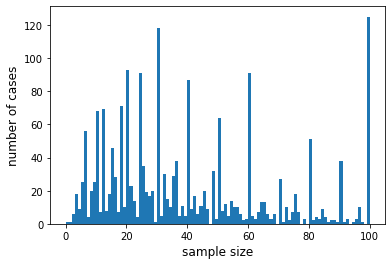

In [112]:
import matplotlib.pyplot as plt
plt.hist(a['sample_size'].sort_values(),bins=100,range=(0,100))
plt.xlabel('sample size',size=12)
plt.ylabel('number of cases',size=12)
plt.savefig('japic_sample_size.png')

In [113]:
a[0] = pd.to_datetime(a[0],format='%Y/%m/%d')

In [114]:
import matplotlib.pyplot as plt
a['year'] = pd.DatetimeIndex(a[0]).year
a['month'] = pd.DatetimeIndex(a[0]).month
a['year-month']=a['year'].astype(str).str.cat(a['month'].astype(str), sep='-')

In [115]:
a['year-month']= pd.to_datetime(a['year-month'],format='%Y-%m')

In [116]:
b=a['year-month'].value_counts()
b.index = pd.to_datetime(b.index,format='%Y/%m/%d')

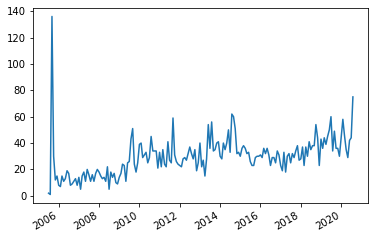

In [117]:
b.plot()
plt.savefig('japic_Registere.png')

In [3]:
df_jRCT=df_jRCT.dropna(how='all')
df_jRCT=df_jRCT.dropna(how='all',axis=1)

In [4]:
num=0
for i in range(3000,4000):
    print(i)
    print(df_jRCT.iat[67,i])

3000


所属機関（実施医療機関） /
                            Affiliation

大分大学医学部附属病院
Oita University Hospital

3001


所属部署

小児科

3002


所属部署の郵便番号

879-5503

3003


所属機関の住所

大分県 由布市挾間町医大ケ丘１丁目１番地

3004


電話番号

097-549-4411

3005


電子メールアドレス

jplsg-admin@umin.ac.jp

3006


研究に関する問合わせ先


担当者氏名

末延　聡一

3007


担当者所属機関

大分大学医学部附属病院

3008


担当者所属部署

小児科

3009


担当者所属機関の郵便番号

879-5503

3010


担当者所属機関の住所

大分県 由布市挾間町医大ケ丘１丁目１番地

3011


電話番号

097-549-4411

3012


FAX番号

097-586-5839

3013


電子メールアドレス

jplsg-admin@umin.ac.jp

3014


研究責任医師の所属する実施医療機関の管理者の氏名

三股　浩光

3015


当該特定臨床研究に対する管理者の許可の有無

あり

3016


認定臨床研究審査委員会の承認日

令和3年4月19日

3017


救急医療に必要な施設又は設備

対応あり

3018


研究責任医師の連絡先


氏名 /
                            Name

盛武　浩
Moritake Hiroshi

3019


e-Rad番号



3020


所属機関（実施医療機関） /
                            Affiliation

宮崎大学医学部附属病院
University of Miyazaki Hospital

3021


所属部署

小児科

3022


所属部署の郵便番号

889-1692

3023


所属機関の住所

宮崎県 宮崎市清武町木原５２００番地

3024


電話番号

0985-85-1510

3025


電子メールアドレス

jplsg-admin@umin.ac

In [5]:
test_data=[]
for j in range(len(df_jRCT)):
    data_append=[None]*9
    ID_data=0
    day_data=0
    inst_data=0
    num_data=0
    design_data=0
    other_ID_data=0
    for i,num in zip(df_jRCT.iloc[j,:],range(len(df_jRCT.iloc[j,:]))):
        
        if num==5:
            data_append[0]=i
            
        elif num==10:
            data_append[1]=i
            
        elif num==11:
            data_append[2]=i
        
        elif (('届出日' in str(i))or ('登録日' in str(i)))and(day_data==0):
            data_append[3]=i
            day_data+=1
        
        
        elif (('臨床研究実施計画番号' in str(i)) or ('jRCT番号' in str(i))) and(ID_data==0):
            data_append[4]=i
            ID_data+=1
            
        elif ('所属機関（実施医療機関）' in str(i)) and (inst_data==0):
            data_append[5]=i
            inst_data+=1
            
        elif (('症例数' in str(i)) or ('実施予定被験者数'in str(i))or('Sample Size'in str(i))) and (num_data==0):
            data_append[6]=i
            num_data+=1
            
        elif ('Study Type' in str(i)) and (design_data==0):
            data_append[7]=i
            design_data+=1
        
        elif ('他の臨床研究登録機関発行の研究番号' in str(i)) and (other_ID_data==0):
            data_append[8]=i
            design_data+=1
            
    test_data.append(data_append)

In [10]:
jRCT_data_frame=pd.DataFrame(test_data)

In [19]:
df_jRCT_test=pd.DataFrame(jRCT_data_frame[0].str.extract('\n\n研究名称\n\n(.+)', expand=True))
df_jRCT_test['phase']=jRCT_data_frame[1].str.extract('\n+.+\n+(.+)', expand=True)
df_jRCT_test['disease_name']=jRCT_data_frame[2].str.extract('\n+.+\n+(.+)', expand=True)
df_jRCT_test['Registered_date']=jRCT_data_frame[3].str.extract('\n+.+\n+(.+)', expand=True)
df_jRCT_test['ID']=jRCT_data_frame[4].str.extract('\n+.+\n+(.+)', expand=True)
df_jRCT_test['affiliation']=jRCT_data_frame[5].str.extract('\n+.+\n+(.+)', expand=True)
df_jRCT_test['study_type']=jRCT_data_frame[7].str.extract('\n+.+\n+.+\n+(.+)', expand=True)
df_jRCT_test['sample_size']=jRCT_data_frame[6].str.extract('\n+.+\n+([0-9]+)', expand=True)
df_jRCT_test['other_ID']=jRCT_data_frame[8].str.extract('\n+\s+他の臨床研究登録機関発行の研究番号\s+\n+(.+)', expand=True)

In [20]:
for i in df_jRCT_test['other_ID']:
    print(i)

nan
nan
nan
nan
nan
NCT04939428
nan
nan
nan
NCT03398655
nan
NCT05003440
なし
nan
nan
2020-005331-78
nan
NCT05011513
nan
nan
nan
nan
NCT04899336
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
NCT04774523
NCT04435600
NCT04960202 
NCT04956640
nan
NCT04882878
nan
nan
nan
nan
nan
nan
nan
nan
該当なし
nan
nan
該当なし
nan
nan
NCT04807595
nan
nan
nan
nan
nan
NCT04846868
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
NCT04888585
なし
NCT04596995
nan
NCT04951622
nan
NCT04895748
NCT04903197
nan
nan
nan
NCT04260191
nan
NCT04846881
nan
nan
NCT04738487 
nan
NCT04712097
nan
NCT04649359
2019-001655-39
nan
なし
NCT04949256
nan
NCT04927975
nan
nan
nan
nan
nan
NCT02777528
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
2020-004436-21
nan
nan
NCT04950127
nan
NCT04923893
NCT04472598
nan
nan
NCT04981431
nan
nan
nan
nan
nan
nan
NCT04777201
NCT04844606
U1111-1267-4412
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
NCT04927312
nan
なし
NCT04806503
NCT02520427
nan
nan
nan
nan
nan
2017-003317-25
nan
nan
nan
nan
NCT04945733
nan


UMIN000022236
UMIN000002419
nan
NCI-2017-00178
UMIN000022490
UMIN000017655
UMIN00022194
nan
nan
2873
nan
UMIN000026004
nan
UMIN000022811
UMIN000011899
UMIN000022236
UMIN 000009049、UMIN000009050
UMIN000023386
UMIN000028553
UMIN000009392
NCT02837003
UMIN000012355
UMIN000007819
nan
nan
nan
nan
UMIN000031096
nan
nan
UMIN000023854
UMIN000029108
UMIN000032149
nan
nan
UMIN000031566
nan
UMIN000021375
nan
nan
nan
UMIN000004346
nan
UMIN000030647
なし
nan
nan
UMIN000026197
nan
nan
nan
UMIN000035158
nan
nan
UMIN 000023890
UMIN000014386
UMIN000025156
13267
UMIN000018817
UMIN000018248
UMIN000011994
UMIN000020774
UMIN000012413
UMIN000011941
nan
UMIN000026028
UMIN000026741
nan
UMIN00001572
UMIN000022462
UMIN000027904
170403
UMIN000027460
UMIN000021061
nan
nan
nan
UMIN000024729
UMIN000026159
UMIN000028309
UMIN000029609
UMIN000027485
nan
UMIN000032257
UMIN000031790
nan
nan
UMIN000019004
nan
nan
nan
UMIN000036062
nan
UMIN000019843
UMIN000031451
UMIN000016788
UMIN000019303
UMIN000031405
UMIN000005103
UMIN00

In [14]:
num = 0
for i in test_data:
    print(num)
    print(i[8])
    num+=1
    print('--------------------')

0



                  他の臨床研究登録機関発行の研究番号                



--------------------
1



                  他の臨床研究登録機関発行の研究番号                



--------------------
2



                  他の臨床研究登録機関発行の研究番号                



--------------------
3



                  他の臨床研究登録機関発行の研究番号                



--------------------
4



                  他の臨床研究登録機関発行の研究番号                



--------------------
5



                  他の臨床研究登録機関発行の研究番号                

NCT04939428

--------------------
6



                  他の臨床研究登録機関発行の研究番号                



--------------------
7



                  他の臨床研究登録機関発行の研究番号                



--------------------
8



                  他の臨床研究登録機関発行の研究番号                



--------------------
9



                  他の臨床研究登録機関発行の研究番号                

NCT03398655

--------------------
10



                  他の臨床研究登録機関発行の研究番号                



--------------------
11



                  他の臨床研究登録機関発行の研究番号                

NCT05003440

--------------




                  他の臨床研究登録機関発行の研究番号                



--------------------
876



                  他の臨床研究登録機関発行の研究番号                



--------------------
877



                  他の臨床研究登録機関発行の研究番号                



--------------------
878



                  他の臨床研究登録機関発行の研究番号                



--------------------
879



                  他の臨床研究登録機関発行の研究番号                



--------------------
880



                  他の臨床研究登録機関発行の研究番号                

NCT04512066

--------------------
881



                  他の臨床研究登録機関発行の研究番号                



--------------------
882



                  他の臨床研究登録機関発行の研究番号                

NCT04223856

--------------------
883



                  他の臨床研究登録機関発行の研究番号                

NCT03669640

--------------------
884



                  他の臨床研究登録機関発行の研究番号                



--------------------
885



                  他の臨床研究登録機関発行の研究番号                



--------------------
886



                  他の臨床研究登録機関発行の研究番号                

1851



                  他の臨床研究登録機関発行の研究番号                



--------------------
1852



                  他の臨床研究登録機関発行の研究番号                



--------------------
1853



                  他の臨床研究登録機関発行の研究番号                

NCT04047160

--------------------
1854



                  他の臨床研究登録機関発行の研究番号                



--------------------
1855



                  他の臨床研究登録機関発行の研究番号                



--------------------
1856



                  他の臨床研究登録機関発行の研究番号                

NCT04609059

--------------------
1857



                  他の臨床研究登録機関発行の研究番号                

なし

--------------------
1858



                  他の臨床研究登録機関発行の研究番号                



--------------------
1859



                  他の臨床研究登録機関発行の研究番号                



--------------------
1860



                  他の臨床研究登録機関発行の研究番号                



--------------------
1861



                  他の臨床研究登録機関発行の研究番号                



--------------------
1862



                  他の臨床研究登録機関発行の研究番号         

2948



                  他の臨床研究登録機関発行の研究番号                



--------------------
2949



                  他の臨床研究登録機関発行の研究番号                



--------------------
2950



                  他の臨床研究登録機関発行の研究番号                



--------------------
2951



                  他の臨床研究登録機関発行の研究番号                

UMIN000020350

--------------------
2952



                  他の臨床研究登録機関発行の研究番号                



--------------------
2953



                  他の臨床研究登録機関発行の研究番号                

該当なし

--------------------
2954



                  他の臨床研究登録機関発行の研究番号                

UMIN000021684

--------------------
2955



                  他の臨床研究登録機関発行の研究番号                



--------------------
2956



                  他の臨床研究登録機関発行の研究番号                

UMIN000029101

--------------------
2957



                  他の臨床研究登録機関発行の研究番号                

UMIN000024536

--------------------
2958



                  他の臨床研究登録機関発行の研究番号                



--------------------
2959



            

In [60]:
jRCT_data_frame.iat[0,7]

'\n\n\n                                    試験等の種類                 /\n                                    Study Type                                \n\n介入研究\nInterventional\n'

In [21]:
df_jRCT_test.to_csv('jRCT_data_Organized_csv.csv')

In [15]:
df_jRCT_test['sample_size']

0         1
1        10
2       195
3       120
4        12
       ... 
3134     30
3135     25
3136    300
3137    200
3138    237
Name: sample_size, Length: 3139, dtype: object

In [91]:
for num in range(3138):
    print(num,df_jRCT_test['year-month'][num])

0 2021-8
1 2021-8
2 2021-8
3 2021-8
4 2021-8
5 2021-8
6 2021-8
7 2021-8
8 2021-8
9 2021-8
10 2021-8
11 2021-8
12 2021-8
13 2021-8
14 2021-8
15 2021-8
16 2021-8
17 2021-8
18 2021-8
19 2021-8
20 2021-8
21 2021-8
22 2021-8
23 2021-8
24 2021-8
25 2021-8
26 2021-8
27 2021-8
28 2021-8
29 2021-8
30 2021-8
31 2021-8
32 2021-8
33 2021-8
34 2021-8
35 2021-8
36 2021-8
37 2021-8
38 2021-8
39 2021-8
40 2021-8
41 2021-8
42 2021-8
43 2021-8
44 2021-8
45 2021-8
46 2021-8
47 2021-8
48 2021-8
49 2021-8
50 2021-8
51 2021-8
52 2021-8
53 2021-8
54 2021-8
55 2021-8
56 2021-8
57 2021-8
58 2021-8
59 2021-8
60 2021-8
61 2021-8
62 2021-8
63 2021-8
64 2021-8
65 2021-8
66 2021-8
67 2021-8
68 2021-8
69 2021-8
70 2021-8
71 2021-8
72 2021-8
73 2021-8
74 2021-8
75 2021-8
76 2021-8
77 2021-8
78 2021-8
79 2021-8
80 2021-8
81 2021-8
82 2021-8
83 2021-8
84 2021-8
85 2021-8
86 2021-8
87 2021-8
88 2021-8
89 2021-8
90 2021-8
91 2021-8
92 2021-8
93 2021-8
94 2021-8
95 2021-8
96 2021-8
97 2021-8
98 2021-8
99 2021-8
100 2021-7

1459 2021-6
1460 2020-4
1461 2020-4
1462 2020-4
1463 2020-11
1464 2020-9
1465 2021-7
1466 2021-2
1467 2021-3
1468 2021-7
1469 2020-4
1470 2021-8
1471 2021-2
1472 2021-7
1473 2020-9
1474 2021-7
1475 2021-7
1476 2021-5
1477 2020-4
1478 2021-8
1479 2020-05
1480 2021-5
1481 2021-6
1482 2021-4
1483 2020-5
1484 2021-1
1485 2020-11
1486 2021-3
1487 2020-4
1488 2021-6
1489 2020-3
1490 2021-5
1491 2021-7
1492 2021-5
1493 2020-7
1494 2020-4
1495 2020-4
1496 2021-7
1497 2021-7
1498 2020-4
1499 2020-7
1500 2020-3
1501 2021-01
1502 2021-5
1503 2020-1
1504 2021-01
1505 2020-12
1506 2021-4
1507 2021-4
1508 2021-5
1509 2020-9
1510 2020-3
1511 2020-12
1512 2021-6
1513 2021-4
1514 2020-12
1515 2020-6
1516 2021-7
1517 2021-2
1518 2020-05
1519 2020-3
1520 2021-8
1521 2021-4
1522 2021-3
1523 2020-11
1524 2020-12
1525 2020-5
1526 2020-2
1527 2020-10
1528 2021-5
1529 2021-7
1530 2020-5
1531 2020-12
1532 2021-5
1533 2020-5
1534 2021-1
1535 2021-8
1536 2021-7
1537 2021-1
1538 2021-6
1539 2021-7
1540 2021-5
154

2813 2019-03
2814 2020-6
2815 2019-12
2816 2020-10
2817 2021-4
2818 2020-11
2819 2020-4
2820 2021-4
2821 2021-5
2822 2021-3
2823 2021-8
2824 2020-04
2825 2019-08
2826 2021-3
2827 2021-8
2828 2021-5
2829 2021-2
2830 2021-3
2831 2021-3
2832 2020-3
2833 2021-8
2834 2021-6
2835 2021-8
2836 2020-09
2837 2020-10
2838 2020-6
2839 2021-6
2840 2020-12
2841 2020-11
2842 2021-4
2843 2019-8
2844 2020-5
2845 2020-4
2846 2020-4
2847 2021-7
2848 2021-8
2849 2021-3
2850 2021-5
2851 2019-9
2852 2020-11
2853 2021-8
2854 2021-7
2855 2021-8
2856 2021-7
2857 2020-08
2858 2021-6
2859 2021-2
2860 2020-3
2861 2021-1
2862 2021-3
2863 2021-5
2864 2021-3
2865 2021-3
2866 2019-12
2867 2020-12
2868 2019-11
2869 2020-12
2870 2020-2
2871 2020-9
2872 2020-10
2873 2021-4
2874 2021-7
2875 2021-5
2876 2021-3
2877 2021-5
2878 2021-6
2879 2019-10
2880 2021-8
2881 2021-7
2882 2020-2
2883 2021-3
2884 2021-6
2885 2021-1
2886 2021-6
2887 2020-05
2888 2019-04
2889 2020-5
2890 2020-09
2891 2021-8
2892 2020-7
2893 2021-8
2894 20

In [39]:
test_data[3138]

['\n\n研究名称\n\n切迫流・早産における子宮頸管ペッサリーの有用性に関する検討\n',
 '\n\n試験のフェーズ\n\n2\n',
 '\n\n対象疾患名\n\n切迫早産\n',
 '\n\n観察期間終了日 / Completion date\n\n\n2020年09月21日\n',
 '\n\n実施症例数 / Result actual enrolment\n\n\n237\n',
 '\n\n               臨床研究実施計画番号            \njRCTs042180102\n',
 '\n\n                            所属機関（実施医療機関）                         /                             Affiliation                        \n\n名古屋市立大学病院\nNagoya City University Hospital\n']

In [37]:
import datetime
df_jRCT_test['year']=df_jRCT_test['Registered_date'].str.extract('([0-9]+)年', expand=True)
df_jRCT_test['month']=df_jRCT_test['Registered_date'].str.extract('([0-9]+)月', expand=True)
df_jRCT_test.loc[(df_jRCT_test['Registered_date'].str.contains('元年',na=False)), 'year'] = int(1)
df_jRCT_test.loc[(df_jRCT_test['Registered_date'].str.contains('令和',na=False)), 'year_Calendar'] = int(2018)
df_jRCT_test.loc[(df_jRCT_test['Registered_date'].str.contains('平成',na=False)), 'year_Calendar'] = int(1989)
df_jRCT_test['year_Calendar']=df_jRCT_test['year_Calendar'].fillna(0)
df_jRCT_test['year']=df_jRCT_test['year'].fillna(0)
df_jRCT_test['year']=df_jRCT_test['year'].astype(int)+df_jRCT_test['year_Calendar'].astype(int)
df_jRCT_test['year-month']=df_jRCT_test['year'].astype(str).str.cat(df_jRCT_test['month'].astype(str), sep='-')
df_jRCT_test['year-month']= pd.to_datetime(df_jRCT_test['year-month'],format='%Y-%m')

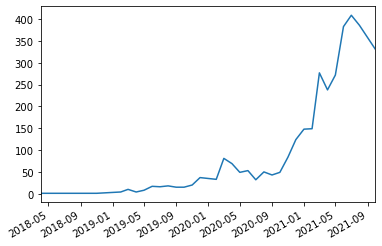

In [118]:
# -*- coding: utf-8 -*-
import datetime
plot_df=df_jRCT_test['year-month'].value_counts()
plot_df.index = pd.to_datetime(plot_df.index,format='%Y/%m/%d')
plot_df.plot(xlim=(datetime.datetime(2018,4,1), datetime.datetime(2021,10,1)))
plt.savefig('jRCT_Registere.png')

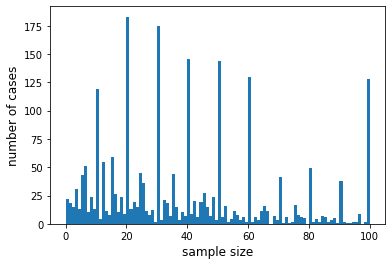

In [108]:
import matplotlib.pyplot as plt
plt.hist(df_jRCT_test['sample_size'].astype(float).sort_values(),bins=100,range=(0,100))
plt.xlabel('sample size',size=12)
plt.ylabel('number of cases',size=12)
plt.savefig('jRCT_sample_size.png')

In [18]:
import matplotlib.pyplot as plt
df_jRCT_test['sample_size']=df_jRCT_test['sample_size'].astype(float)
Reg_3=df_jRCT_test[df_jRCT_test['phase'].str.contains('3')]
plt.figure(figsize=(12,8))
plt.hist(Reg_3['sample_size'].sort_values(),bins=100,range=(0,100))
plt.xlabel('sample size',size=12)
plt.ylabel('number of cases',size=12)
plt.savefig('jRCT_sample_size_hist_phase3_reglation.png')
plt.clf()
plt.close()

In [62]:
df_jRCT_test

,0,phase,disease_name,Registered_date,ID,affiliation,study_type,sample_size
0,DFI12712試験を完了した日本の酸性スフィンゴミエリナーゼ欠損症（ASMD）患者を対象と...,2-3,酸性スフィンゴミエリナーゼ欠損症,令和3年8月19日,jRCT2031210279,サノフィ株式会社,介入研究,1
1,EPI-589の筋萎縮性側索硬化症を対象とした探索的試験,2,筋萎縮性側索硬化症,令和3年8月24日,jRCT2061210031,徳島大学病院,介入研究,10
2,LUNA18の単剤投与及び併用投与による局所進行性又は転移性固形癌患者を対象とした用量漸増及...,1,固形癌,令和3年8月20日,jRCT2031210282,"Chugai Pharma USA, Inc.",介入研究,195
3,レベスティブ皮下注用3.8mg特定使用成績調査（全例調査）,N/A,短腸症候群,令和3年8月23日,jRCT2031210284,武田薬品工業株式会社,観察研究,120
4,天疱瘡患者を対象としたEfgartigimod PH20 SC の安全性、忍容性及び有効性を...,3,中等度から重度の成人尋常性天疱瘡（PV）又は落葉状天疱瘡（PF）患者,令和3年8月19日,jRCT2031210277,川崎医科大学附属病院,介入研究,12
...,...,...,...,...,...,...,...,...
3134,喀痰排出補助器材「Aerobika®」の有効性に関する臨床研究,4,慢性閉塞性肺疾患,平成30年6月4日,jRCT1032180010,聖マリアンナ医科大学,介入研究,30
3135,高齢者局所進行胃癌に対する術前化学療法としてのS-1+オキサリプラチン併用療法の,2,胃癌,令和3年8月11日,jRCTs071180001,群馬大学大学院,介入研究,25
3136,消化器癌に対する術中ICG局注赤外線内視鏡観察による術中リンパ節、リンパ流評価の有用性につい...,N/A,消化管癌,令和3年4月1日,jRCTs051180001,京都大学医学部附属病院,介入研究,300
3137,インフリキシマブ投与下で寛解または低疾患活動性にある関節リウマチ患者を対象としたインフリキシ...,4,関節リウマチ,令和3年4月1日,jRCTs031180001,千葉大学医学部附属病院,介入研究,200
